Importing Libraries

In [330]:
import pandas as pd
import numpy as np
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model  import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import warnings
import statsmodels.api as s
import statsmodels.api as sm
import statsmodels.stats.api as ssm
warnings.filterwarnings("ignore")
sns.set_style('darkgrid')

In [402]:
# Load the dataset
df = pd.read_csv('/content/winequality-red.csv')


In [403]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [404]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


Exploratory data Analysis And Statistical Analysis

In [334]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [335]:
df.shape

(1599, 12)

In [336]:
df.isnull()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


In [337]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [338]:
corr_matrix = df.corr()

In [339]:
corr_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [340]:
corr_matrix["quality"]

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

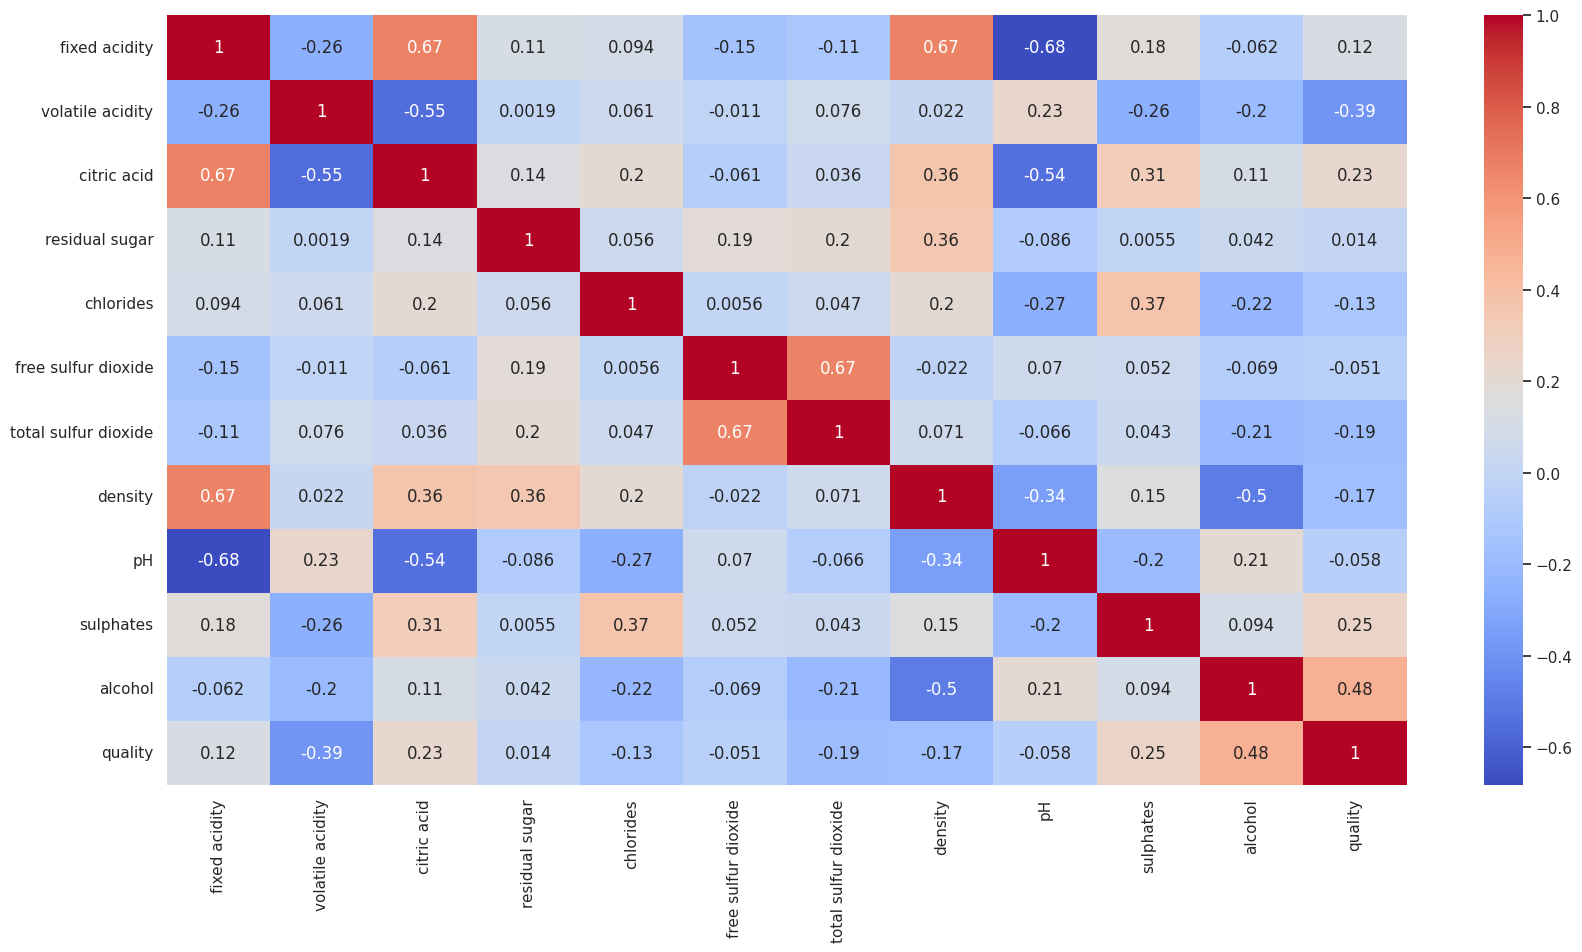

In [341]:
def show_correlation(df):
  plt.figure(figsize=(20,10))
  sns.set(style='whitegrid', context='notebook')
  sns.heatmap(df.corr(), annot=True, square= False, cmap='coolwarm')
  plt.show()

show_correlation(df)


From the heatmap, we can observe the following:

- There is a strong positive correlation between quality and alcohol content.
- There is a moderate positive correlation between quality and volatile acidity.
- There is a weak positive correlation between quality and citric acid.
- There is a weak negative correlation between quality and residual sugar.
- There is a weak negative correlation between quality and free sulfur dioxide.
- There is a weak negative correlation between quality and total sulfur dioxide.
- There is a weak negative correlation between quality and pH.
- There is no correlation between quality and fixed acidity.
- There is no correlation between quality and chlorides.
- There is no correlation between quality and density.
- There is no correlation between quality and sulphates.

Overall, the heatmap shows that there are a few factors that have a significant impact on the quality of red wine, such as alcohol content, volatile acidity, and citric acid.

Detecting Outlier using Z-score

In [342]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

putting Data to alternate df to perform multiple technique

In [343]:
df1 = df

In [344]:
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [345]:
mean = np.mean(df1['quality'])

In [346]:
mean

5.6360225140712945

In [347]:
std = np.std(df1['quality'])
std
threshold = 3
outliers = df1[np.abs(df['quality'] - mean) > threshold * std]
outliers


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
459,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.00,3
517,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.40,3
690,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.70,3
832,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.90,3
899,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.00,3
1299,7.6,1.580,0.00,2.10,0.137,5.0,9.0,0.99476,3.50,0.40,10.90,3
1374,6.8,0.815,0.00,1.20,0.267,16.0,29.0,0.99471,3.32,0.51,9.80,3
1469,7.3,0.980,0.05,2.10,0.061,20.0,49.0,0.99705,3.31,0.55,9.70,3
1478,7.1,0.875,0.05,5.70,0.082,3.0,14.0,0.99808,3.40,0.52,10.20,3
1505,6.7,0.760,0.02,1.80,0.078,6.0,12.0,0.99600,3.55,0.63,9.95,3


In [348]:
cleaned_df1 = df1[(abs(z_scores) <= threshold)]

print("Dataframe after removing outliers: ")
print(cleaned_df1)

Dataframe after removing outliers: 
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0

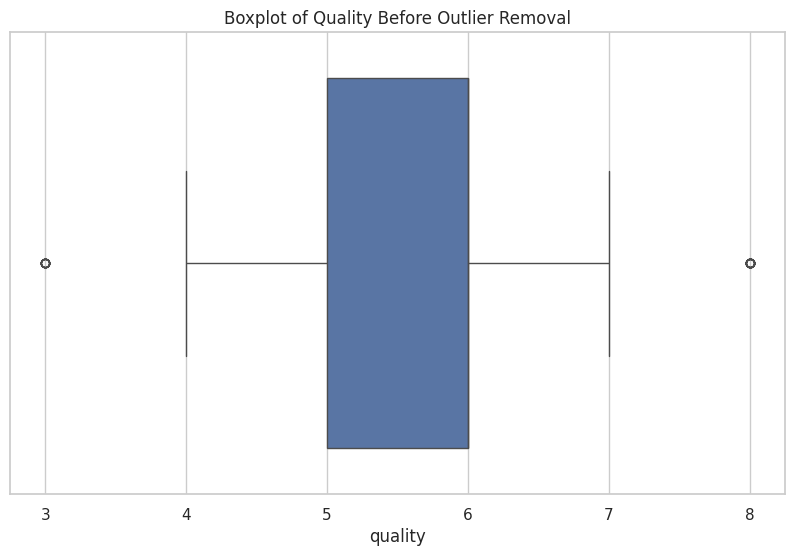

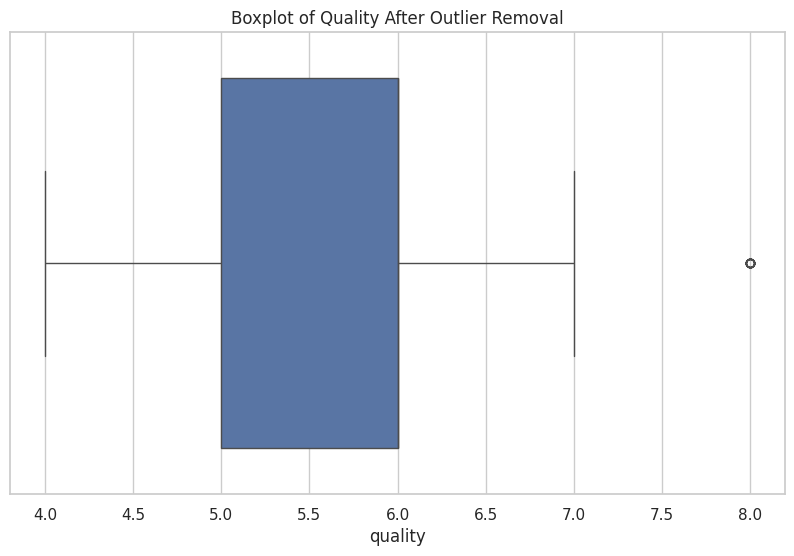

In [349]:

import matplotlib.pyplot as plt
# Before outlier removal
plt.figure(figsize=(10,6))
sns.boxplot(x=df1['quality'])
plt.title('Boxplot of Quality Before Outlier Removal')
plt.show()

# After outlier removal
plt.figure(figsize=(10,6))
sns.boxplot(x=cleaned_df1['quality'])
plt.title('Boxplot of Quality After Outlier Removal')
plt.show()


In [350]:
df2 =df

In [351]:
df2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Interquartile Range (IQR) Technique to find Outlier

In [405]:
# Calculate Interquartile Range (IQR)
Q1 = df2['quality'].quantile(0.25)
Q3 = df2['quality'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Select rows within the lower and upper bounds
cleaned_df2 = df2[(df2['quality'] >= lower_bound) & (df2['quality'] <= upper_bound)]

# Print the cleaned data
print("Dataframe after removing outliers using IQR method:")
print(cleaned_df2)


Dataframe after removing outliers using IQR method:
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47       

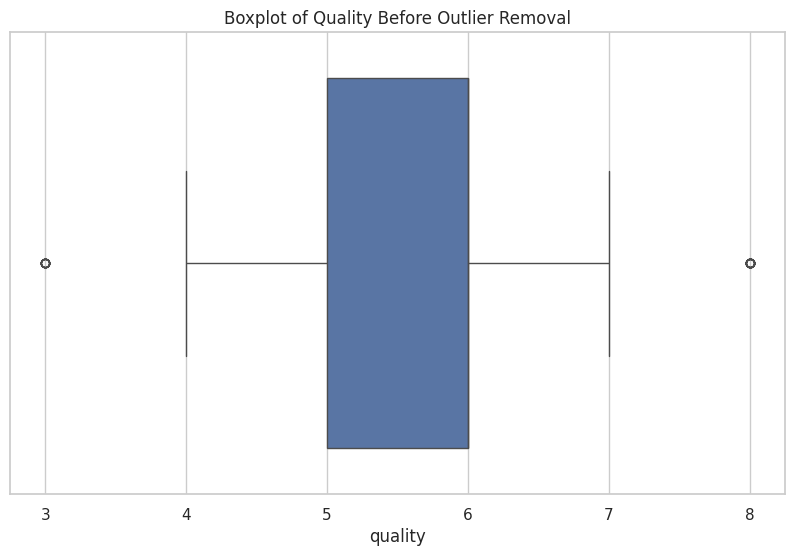

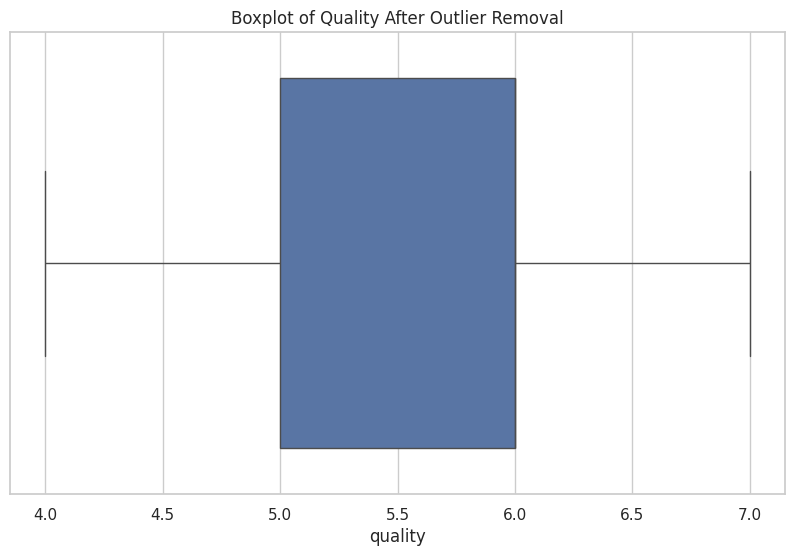

Number of outliers removed: 28


In [353]:
import matplotlib.pyplot as plt
# Create a boxplot of the quality column
plt.figure(figsize=(10,6))
sns.boxplot(x=df2['quality'])
plt.title('Boxplot of Quality Before Outlier Removal')
plt.show()

# Calculate the IQR and outlier bounds
Q1 = df2['quality'].quantile(0.25)
Q3 = df2['quality'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a new DataFrame with the outliers removed
cleaned_df2 = df2[(df2['quality'] >= lower_bound) & (df2['quality'] <= upper_bound)]

# Create a boxplot of the quality column after outlier removal
plt.figure(figsize=(10,6))
sns.boxplot(x=cleaned_df2['quality'])
plt.title('Boxplot of Quality After Outlier Removal')
plt.show()

# Print the number of outliers removed
outliers_removed = len(df2) - len(cleaned_df2)
print(f"Number of outliers removed: {outliers_removed}")


Randomly select 100 samples from your variable, design a proper hypothesis

In [354]:
# Select the variables

volatile_acidity = df1['volatile acidity']
fixed_acidity = df1['fixed acidity']
pH = df1['pH']
density = df1['density']


# Randomly select 100 samples from each variable

volatile_acidity = volatile_acidity.sample(n=100, random_state=1)
fixed_acidity = fixed_acidity.sample(n=100, random_state=1)
pH = pH.sample(n=100, random_state=1)
suplhates = density.sample(n=100, random_state=1)

In [355]:
# Perform analysis on the volatile_acidity variable
volatile_acidity_mean = volatile_acidity.mean()
volatile_acidity_prop = (volatile_acidity > 0).mean()
volatile_acidity_null_hypo = "The true mean of volatile_acidity is equal to 0"
volatile_acidity_alt_hypo = "The true mean of volatile_acidity is not equal to 0"
print("Claim for volatile_acidity ", volatile_acidity_null_hypo)
volatile_acidity_t_stat, volatile_acidity_p_value = stats.ttest_1samp(volatile_acidity, 0)
volatile_acidity_conf_int = stats.t.interval(0.95, len(volatile_acidity)-1, loc=volatile_acidity_mean, scale=stats.sem(volatile_acidity))
print("volatile_acidity Variable")
print(f"Claim - Mean: {volatile_acidity_mean:.2f}, Proportion: {volatile_acidity_prop:.2f}")
print(f"Hypothesis test - t-statistic: {volatile_acidity_t_stat:.2f}, p-value: {volatile_acidity_p_value:.2f}")
print(f"Confidence Interval - ({volatile_acidity_conf_int[0]:.2f}, {volatile_acidity_conf_int[1]:.2f})\n")
if volatile_acidity_p_value<0.05:
  print("since p-value is less than level of significance, we reject the null hypothesis and accept alternate hypothesis")
  print(volatile_acidity_alt_hypo,"\n")
else:
  print("since p-value is greater than level of significance, we accept the null hypothesis and reject alternate hypothesis")
  print(volatile_acidity_null_hypo,"\n")

Claim for volatile_acidity  The true mean of volatile_acidity is equal to 0
volatile_acidity Variable
Claim - Mean: 0.50, Proportion: 1.00
Hypothesis test - t-statistic: 29.76, p-value: 0.00
Confidence Interval - (0.46, 0.53)

since p-value is less than level of significance, we reject the null hypothesis and accept alternate hypothesis
The true mean of volatile_acidity is not equal to 0 



In [356]:
# Perform analysis on the fixed_acidity variable

fixed_acidity_mean = fixed_acidity.mean()
fixed_acidity_prop = (fixed_acidity > 0).mean()
fixed_acidity_null_hypo = "The true mean of fixed_acidity is equal to 0"
fixed_acidity_alt_hypo = "The true mean of fixed_acidity is not equal to 0"
print("Claim for fixed_acidity ", fixed_acidity_null_hypo)
fixed_acidity_t_stat, fixed_acidity_p_value = stats.ttest_1samp(fixed_acidity, 0)
fixed_acidity_conf_int = stats.t.interval(0.95, len(fixed_acidity)-1, loc=fixed_acidity_mean, scale=stats.sem(fixed_acidity))
print("fixed_acidity Variable")
print(f"Claim - Mean: {fixed_acidity_mean:.2f}, Proportion: {fixed_acidity_prop:.2f}")
print(f"Hypothesis test - t-statistic: {fixed_acidity_t_stat:.2f}, p-value: {fixed_acidity_p_value:.2f}")
print(f"Confidence Interval - ({fixed_acidity_conf_int[0]:.2f}, {fixed_acidity_conf_int[1]:.2f})\n")
if fixed_acidity_p_value<0.05:
  print("since p-value is less than level of significance, we reject the null hypothesis and accept alternate hypothesis")
  print(fixed_acidity_alt_hypo,"\n")
else:
  print("since p-value is greater than level of significance, we accept the null hypothesis and reject alternate hypothesis")
  print(fixed_acidity_null_hypo,"\n")

Claim for fixed_acidity  The true mean of fixed_acidity is equal to 0
fixed_acidity Variable
Claim - Mean: 8.62, Proportion: 1.00
Hypothesis test - t-statistic: 53.79, p-value: 0.00
Confidence Interval - (8.30, 8.94)

since p-value is less than level of significance, we reject the null hypothesis and accept alternate hypothesis
The true mean of fixed_acidity is not equal to 0 



In [357]:
# Perform analysis on the pH variable
pH_mean = pH.mean()
pH_prop = (pH > 0).mean()
pH_null_hypo = "The true mean of pH is equal to 0"
pH_alt_hypo = "The true mean of pH is not equal to 0"
print("Claim for pH ", pH_null_hypo)
pH_t_stat, pH_p_value = stats.ttest_1samp(pH, 0)
pH_conf_int = stats.t.interval(0.95, len(pH)-1, loc=pH_mean, scale=stats.sem(pH))
print("pH Variable")
print(f"Claim - Mean: {pH_mean:.2f}, Proportion: {pH_prop:.2f}")
print(f"Hypothesis test - t-statistic: {pH_t_stat:.2f}, p-value: {pH_p_value:.2f}")
print(f"Confidence Interval - ({pH_conf_int[0]:.2f}, {pH_conf_int[1]:.2f})\n")
if pH_p_value<0.05:
  print("since p-value is less than level of significance, we reject the null hypothesis and accept alternate hypothesis")
  print(pH_alt_hypo,"\n")
else:
  print("since p-value is greater than level of significance, we accept the null hypothesis and reject alternate hypothesis")
  print(pH_null_hypo,"\n")

Claim for pH  The true mean of pH is equal to 0
pH Variable
Claim - Mean: 3.27, Proportion: 1.00
Hypothesis test - t-statistic: 245.26, p-value: 0.00
Confidence Interval - (3.25, 3.30)

since p-value is less than level of significance, we reject the null hypothesis and accept alternate hypothesis
The true mean of pH is not equal to 0 



In [358]:
# Perform analysis on the density variable

density_mean = density.mean()
density_prop = (density > 0).mean()
density_null_hypo = "The true mean of density is equal to 0"
density_alt_hypo = "The true mean of density is not equal to 0"
print("Claim for density ", density_null_hypo)
density_t_stat, density_p_value = stats.ttest_1samp(density, 0)
density_conf_int = stats.t.interval(0.95, len(density)-1, loc=density_mean, scale=stats.sem(density))
print("density Variable")
print(f"Claim - Mean: {density_mean:.2f}, Proportion: {density_prop:.2f}")
print(f"Hypothesis test - t-statistic: {density_t_stat:.2f}, p-value: {density_p_value:.2f}")
print(f"Confidence Interval - ({density_conf_int[0]:.2f}, {density_conf_int[1]:.2f})\n")
if density_p_value<0.05:
  print("since p-value is less than level of significance, we reject the null hypothesis and accept alternate hypothesis")
  print(density_alt_hypo,"\n")
else:
  print("since p-value is greater than level of significance, we accept the null hypothesis and reject alternate hypothesis")
  print(density_null_hypo,"\n")


Claim for density  The true mean of density is equal to 0
density Variable
Claim - Mean: 1.00, Proportion: 1.00
Hypothesis test - t-statistic: 21118.36, p-value: 0.00
Confidence Interval - (1.00, 1.00)

since p-value is less than level of significance, we reject the null hypothesis and accept alternate hypothesis
The true mean of density is not equal to 0 



Randomly select another 200 samples, and compare two sample means and proportions.
 Hypothesis test, CI  for the variable, Interpret the result



In [359]:
# randomly select 200 samples- set2
sample1 = df1["volatile acidity"].sample(n=200, random_state=42)
sample2 = df1["volatile acidity"].sample(n=200, random_state=2)

# calculate sample means and proportions
mean1 = sample1.mean()
mean2 = sample2.mean()
prop1 = (sample1 > 0).mean()
prop2 = (sample2 > 0).mean()

# conduct two-sample t-test
t_stat, p_value = stats.ttest_ind(sample1, sample2)

# calculate confidence intervals
conf_int1 = stats.t.interval(0.95, len(sample1)-1, loc=mean1, scale=stats.sem(sample1))
conf_int2 = stats.t.interval(0.95, len(sample2)-1, loc=mean2, scale=stats.sem(sample2))

# print results
print("Comparing two samples on the following features: volatile acidity")
print(f"Sample 1 - Mean: {mean1:.2f}, Proportion: {prop1:.2f}")
print(f"Sample 2 - Mean: {mean2:.2f}, Proportion: {prop2:.2f}")
print(f"Hypothesis test - t-statistic: {t_stat:.2f}, p-value: {p_value:.2f}")
print(f"Confidence Interval for Sample 1 - ({conf_int1[0]:.2f}, {conf_int1[1]:.2f})")
print(f"Confidence Interval for Sample 2 - ({conf_int2[0]:.2f}, {conf_int2[1]:.2f})")

Comparing two samples on the following features: volatile acidity
Sample 1 - Mean: 0.51, Proportion: 1.00
Sample 2 - Mean: 0.51, Proportion: 1.00
Hypothesis test - t-statistic: 0.05, p-value: 0.96
Confidence Interval for Sample 1 - (0.49, 0.54)
Confidence Interval for Sample 2 - (0.49, 0.54)


In [361]:
# randomly select 200 samples- set2
sample1 = df["fixed acidity"].sample(n=200, random_state=42)
sample2 = df["fixed acidity"].sample(n=200, random_state=2)

# calculate sample means and proportions
mean1 = sample1.mean()
mean2 = sample2.mean()
prop1 = (sample1 > 0).mean()
prop2 = (sample2 > 0).mean()

# conduct two-sample t-test
t_stat, p_value = stats.ttest_ind(sample1, sample2)

# calculate confidence intervals
conf_int1 = stats.t.interval(0.95, len(sample1)-1, loc=mean1, scale=stats.sem(sample1))
conf_int2 = stats.t.interval(0.95, len(sample2)-1, loc=mean2, scale=stats.sem(sample2))

# print results
print("Comparing two samples on the following features: fixed acidity")
print(f"Sample 1 - Mean: {mean1:.2f}, Proportion: {prop1:.2f}")
print(f"Sample 2 - Mean: {mean2:.2f}, Proportion: {prop2:.2f}")
print(f"Hypothesis test - t-statistic: {t_stat:.2f}, p-value: {p_value:.2f}")
print(f"Confidence Interval for Sample 1 - ({conf_int1[0]:.2f}, {conf_int1[1]:.2f})")
print(f"Confidence Interval for Sample 2 - ({conf_int2[0]:.2f}, {conf_int2[1]:.2f})")

Comparing two samples on the following features: fixed acidity
Sample 1 - Mean: 8.21, Proportion: 1.00
Sample 2 - Mean: 8.31, Proportion: 1.00
Hypothesis test - t-statistic: -0.57, p-value: 0.57
Confidence Interval for Sample 1 - (7.96, 8.46)
Confidence Interval for Sample 2 - (8.05, 8.58)


In [362]:
# randomly select 200 samples- set3
sample1 = df1["pH"].sample(n=200, random_state=42)
sample2 = df1["pH"].sample(n=200, random_state=2)

# calculate sample means and proportions
mean1 = sample1.mean()
mean2 = sample2.mean()
prop1 = (sample1 > 0).mean()
prop2 = (sample2 > 0).mean()

# conduct two-sample t-test
t_stat, p_value = stats.ttest_ind(sample1, sample2)

# calculate confidence intervals
conf_int1 = stats.t.interval(0.95, len(sample1)-1, loc=mean1, scale=stats.sem(sample1))
conf_int2 = stats.t.interval(0.95, len(sample2)-1, loc=mean2, scale=stats.sem(sample2))

# print results
print("Comparing two samples on the following features: pH")
print(f"Sample 1 - Mean: {mean1:.2f}, Proportion: {prop1:.2f}")
print(f"Sample 2 - Mean: {mean2:.2f}, Proportion: {prop2:.2f}")
print(f"Hypothesis test - t-statistic: {t_stat:.2f}, p-value: {p_value:.2f}")
print(f"Confidence Interval for Sample 1 - ({conf_int1[0]:.2f}, {conf_int1[1]:.2f})")
print(f"Confidence Interval for Sample 2 - ({conf_int2[0]:.2f}, {conf_int2[1]:.2f})")

Comparing two samples on the following features: pH
Sample 1 - Mean: 3.32, Proportion: 1.00
Sample 2 - Mean: 3.32, Proportion: 1.00
Hypothesis test - t-statistic: -0.19, p-value: 0.85
Confidence Interval for Sample 1 - (3.30, 3.34)
Confidence Interval for Sample 2 - (3.30, 3.34)


In [363]:
# randomly select 200 samples - set4
sample1 = df1["density"].sample(n=200, random_state=42)
sample2 = df1["density"].sample(n=200, random_state=42)

# calculate sample means and proportions
mean1 = sample1.mean()
mean2 = sample2.mean()
prop1 = (sample1 > 0).mean()
prop2 = (sample2 > 0).mean()

# conduct two-sample t-test
t_stat, p_value = stats.ttest_ind(sample1, sample2)

# calculate confidence intervals
conf_int1 = stats.t.interval(0.95, len(sample1)-1, loc=mean1, scale=stats.sem(sample1))
conf_int2 = stats.t.interval(0.95, len(sample2)-1, loc=mean2, scale=stats.sem(sample2))

# print results
print("Comparing two samples on the following features: density")
print(f"Sample 1 - Mean: {mean1:.2f}, Proportion: {prop1:.2f}")
print(f"Sample 2 - Mean: {mean2:.2f}, Proportion: {prop2:.2f}")
print(f"Hypothesis test - t-statistic: {t_stat:.2f}, p-value: {p_value:.2f}")
print(f"Confidence Interval for Sample 1 - ({conf_int1[0]:.2f}, {conf_int1[1]:.2f})")
print(f"Confidence Interval for Sample 2 - ({conf_int2[0]:.2f}, {conf_int2[1]:.2f})")

Comparing two samples on the following features: density
Sample 1 - Mean: 1.00, Proportion: 1.00
Sample 2 - Mean: 1.00, Proportion: 1.00
Hypothesis test - t-statistic: 0.00, p-value: 1.00
Confidence Interval for Sample 1 - (1.00, 1.00)
Confidence Interval for Sample 2 - (1.00, 1.00)


 Find the correlation between variable and target (dependent) variables. Using the hypothesis test  and CI  to interpret results.


In [364]:
# Extract the "volatile acidity" and "quality" variables
volatile_acidity = df1['volatile acidity']
alcohol = df1['quality']

# Calculating  the correlation coefficient
corr = volatile_acidity.corr(alcohol)
print(f"Correlation coefficient: {corr:.2f}")

# calculating the   p-value
p_value = stats.pearsonr(volatile_acidity, alcohol)[1]
print("p-value of correlation between   Variable and Target is:",p_value)

#Interpreting the results obtained

if p_value<0.05:
  print("The p-value:",p_value,"is less than 0.05 \nand hence the correlation between Variable and Target is statistically significant")
else:
  print("The p-value:",p_value,"is greater than 0.05 \nand hence the correlation between Variable and Target is not  statistically significant")

#calculating confidence interval

conf_int=stats.norm.interval(0.95,loc=corr,scale=1/np.sqrt(len(df)))
print("\nConfidence interval of correlation between variable and target at 95% is",conf_int)

#Interpreting results

if conf_int[0]>0:
  print("\nThere's a positive correlation. \nsince 95% confidence interval of correlation between variable and target is greater than 0")
elif conf_int[1]<0:
  print("\nThere's a negative correlation.\nsince 95% confidence interval of correlation between variable and target is less than 0")
else:
  print("\nThere's no correlation. \nsince 95% confidence interval of correlation between variable and target contains 0")


Correlation coefficient: -0.39
p-value of correlation between   Variable and Target is: 2.051714807013609e-59
The p-value: 2.051714807013609e-59 is less than 0.05 
and hence the correlation between Variable and Target is statistically significant

Confidence interval of correlation between variable and target at 95% is (-0.4395721992774804, -0.3415433612505336)

There's a negative correlation.
since 95% confidence interval of correlation between variable and target is less than 0


In [365]:
# Extract the "fixed acidity" and "quality" variables
fixed_acidity = df1['fixed acidity']
alcohol = df1['quality']

# Calculating  the correlation coefficient
corr = fixed_acidity.corr(alcohol)
print(f"Correlation coefficient: {corr:.2f}")

# calculating the   p-value
p_value = stats.pearsonr(fixed_acidity, alcohol)[1]
print("p-value of correlation between  Residual Sugar and Alcohol(Target) is:",p_value)

#Interpreting the results obtained

if p_value<0.05:
  print("The p-value:",p_value,"is less than 0.05 \nand hence the correlation between Variable and Target is statistically significant")
else:
  print("The p-value:",p_value,"is greater than 0.05 \nand hence the correlation between Variable and Target is not  statistically significant")

#calculating confidence interval

conf_int=stats.norm.interval(0.95,loc=corr,scale=1/np.sqrt(len(df)))
print("\nConfidence interval of correlation between variable and target at 95% is",conf_int)

#Interpreting results

if conf_int[0]>0:
  print("\nThere's a positive correlation. \nsince 95% confidence interval of correlation between variable and target is greater than 0")
elif conf_int[1]<0:
  print("\nThere's a negative correlation.\nsince 95% confidence interval of correlation between variable and target is less than 0")
else:
  print("\nThere's no correlation. \nsince 95% confidence interval of correlation between variable and target contains 0")

Correlation coefficient: 0.12
p-value of correlation between  Residual Sugar and Alcohol(Target) is: 6.495635009279656e-07
The p-value: 6.495635009279656e-07 is less than 0.05 
and hence the correlation between Variable and Target is statistically significant

Confidence interval of correlation between variable and target at 95% is (0.07503723009975084, 0.17306606812669773)

There's a positive correlation. 
since 95% confidence interval of correlation between variable and target is greater than 0


In [366]:
# Extract the "Ph" and "quality" variables
pH = df1['pH']
alcohol = df1['quality']

# Calculating  the correlation coefficient
corr = pH.corr(alcohol)
print(f"Correlation coefficient: {corr:.2f}")

# calculating the   p-value
p_value = stats.pearsonr(pH, alcohol)[1]
print("p-value of correlation between  Ph and quality(Target) is:",p_value)

#Interpreting the results obtained

if p_value<0.05:
  print("The p-value:",p_value,"is less than 0.05 \nand hence the correlation between Variable and Target is statistically significant")
else:
  print("The p-value:",p_value,"is greater than 0.05 \nand hence the correlation between Variable and Target is not  statistically significant")

#calculating confidence interval

conf_int=stats.norm.interval(0.95,loc=corr,scale=1/np.sqrt(len(df)))
print("\nConfidence interval of correlation between variable and target at 95% is",conf_int)

#Interpreting results

if conf_int[0]>0:
  print("\nThere's a positive correlation. \nsince 95% confidence interval of correlation between variable and target is greater than 0")
elif conf_int[1]<0:
  print("\nThere's a negative correlation.\nsince 95% confidence interval of correlation between variable and target is less than 0")
else:
  print("\nThere's no correlation. \nsince 95% confidence interval of correlation between variable and target contains 0")

Correlation coefficient: -0.06
p-value of correlation between  Ph and quality(Target) is: 0.02096277865147378
The p-value: 0.02096277865147378 is less than 0.05 
and hence the correlation between Variable and Target is statistically significant

Confidence interval of correlation between variable and target at 95% is (-0.10674581021885558, -0.008716972191908715)

There's a negative correlation.
since 95% confidence interval of correlation between variable and target is less than 0


In [367]:
# Extract the "density" and "quality" variables
density = df1['density']
alcohol = df1['quality']

# Calculating  the correlation coefficient
corr = density.corr(alcohol)
print(f"Correlation coefficient: {corr:.2f}")

# calculating the   p-value
p_value = stats.pearsonr(density, alcohol)[1]
print("p-value of correlation between  density and quality(Target) is:",p_value)

#Interpreting the results obtained

if p_value<0.05:
  print("The p-value:",p_value,"is less than 0.05 \nand hence the correlation between Variable and Target is statistically significant")
else:
  print("The p-value:",p_value,"is greater than 0.05 \nand hence the correlation between Variable and Target is not  statistically significant")

#calculating confidence interval

conf_int=stats.norm.interval(0.95,loc=corr,scale=1/np.sqrt(len(df)))
print("\nConfidence interval of correlation between variable and target at 95% is",conf_int)

#Interpreting results

if conf_int[0]>0:
  print("\nThere's a positive correlation. \nsince 95% confidence interval of correlation between variable and target is greater than 0")
elif conf_int[1]<0:
  print("\nThere's a negative correlation.\nsince 95% confidence interval of correlation between variable and target is less than 0")
else:
  print("\nThere's no correlation. \nsince 95% confidence interval of correlation between variable and target contains 0")

Correlation coefficient: -0.17
p-value of correlation between  density and quality(Target) is: 1.87495665201041e-12
The p-value: 1.87495665201041e-12 is less than 0.05 
and hence the correlation between Variable and Target is statistically significant

Confidence interval of correlation between variable and target at 95% is (-0.22393364679682232, -0.12590480876987542)

There's a negative correlation.
since 95% confidence interval of correlation between variable and target is less than 0


Linear Regrssion

 Find a linear regression equation model between variable and target variable and plot the regression line and residual. Is this a good model
to predict your target variable?


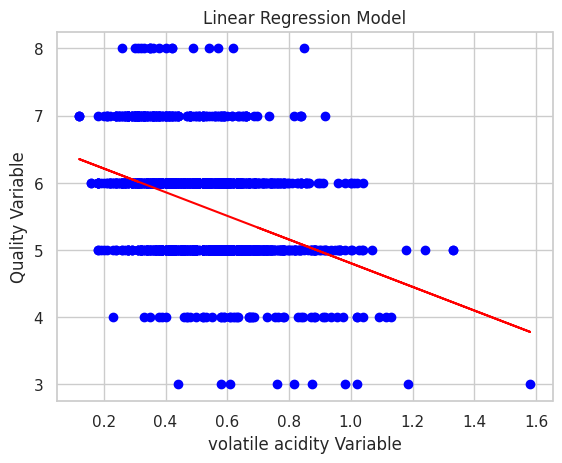

Linear Regression Equation: y = -1.7614377801126662x + 6.565745506471788'


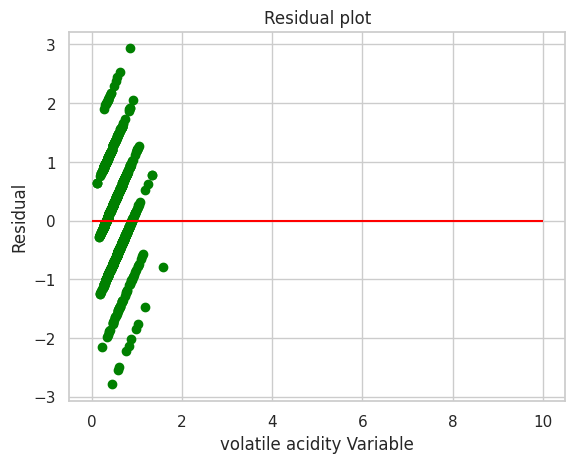

This is not a good model to predict the target variable. Can not get conclusive results


In [368]:
#Code for Linear Regression Model for Volatile acidity
df1.corr()
#selecting the independent and dependent variables
x= df1['volatile acidity'].values.reshape(-1,1)
y= df1[ 'quality'].values.reshape(-1,1)

#fitting the Linear regression model
model = LinearRegression()
model.fit(x,y)
#plotting the regression Line
plt.scatter(x, y, color='blue')
plt.plot(x, model.predict(x), color='red')
plt.title('Linear Regression Model')
plt.xlabel('volatile acidity Variable')
plt.ylabel('Quality Variable')
plt.show()

#calculating the linear regression equation
print("Linear Regression Equation: y = {}x + {}'".format(model.coef_[0][0], model.intercept_[0]))

#calculating the residual
residual = y - model.predict(x)

#plotting the residual graph
plt.scatter(x, residual, color='green')
plt.hlines (y=0, xmin=0, xmax=10, color="red")
plt.title('Residual plot')
plt.xlabel('volatile acidity Variable')
plt.ylabel('Residual')
plt.show()

#checking for good model to predict the target variable

if np.abs(residual).mean() < 0.1:
  print('This is a good model to predict the target variable. Can get conclusive results')
else:
  print('This is not a good model to predict the target variable. Can not get conclusive results')

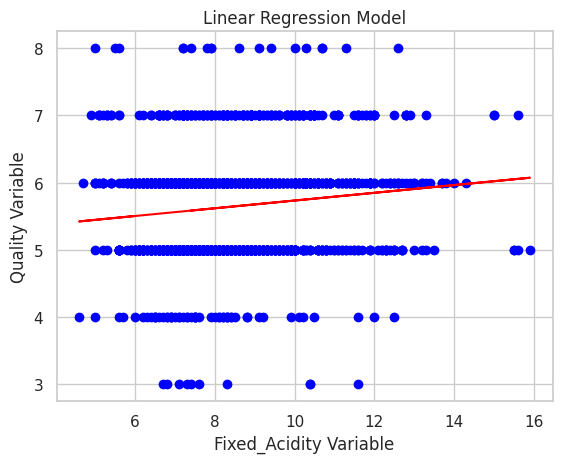

Linear Regression Equation: y = 0.05753864374388123x + 5.157321868924812'


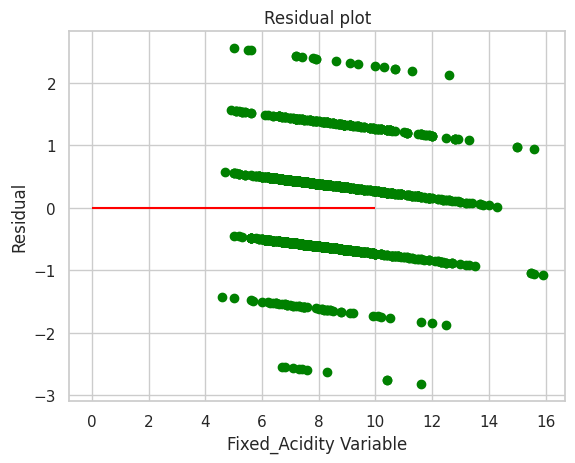

This is not a good model to predict the target variable. Can not get conclusive results


In [369]:
#Code for Linear Regression Model for Residual Sugar
df.corr()
#selecting the independent and dependent variables
x= df1['fixed acidity'].values.reshape(-1,1)
y= df1[ 'quality'].values.reshape(-1,1)

#fitting the Linear regression model
model = LinearRegression()
model.fit(x,y)
#plotting the regression Line
plt.scatter(x, y, color='blue')
plt.plot(x, model.predict(x), color='red')
plt.title('Linear Regression Model')
plt.xlabel('Fixed_Acidity Variable')
plt.ylabel('Quality Variable')
plt.show()

#calculating the linear regression equation
print("Linear Regression Equation: y = {}x + {}'".format(model.coef_[0][0], model.intercept_[0]))

#calculating the residual
residual = y - model.predict(x)

#plotting the residual graph
plt.scatter(x, residual, color='green')
plt.hlines (y=0, xmin=0, xmax=10, color="red")
plt.title('Residual plot')
plt.xlabel('Fixed_Acidity Variable')
plt.ylabel('Residual')
plt.show()

#checking for good model to predict the target variable

if np.abs(residual).mean() < 0.1:
  print('This is a good model to predict the target variable. Can get conclusive results')
else:
  print('This is not a good model to predict the target variable. Can not get conclusive results')

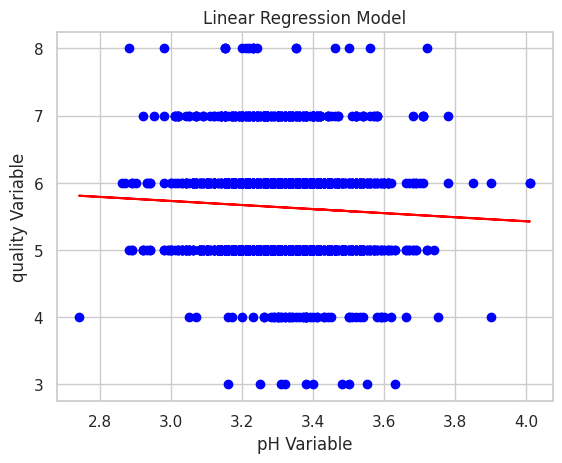

Linear Regression Equation: y = -0.3019831257873803x + 6.635922826758919'


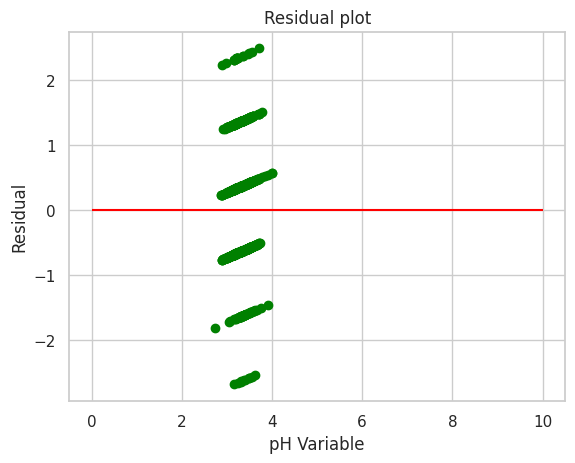

This is not a good model to predict the target variable. Can not get conclusive results


In [370]:
#Code for Linear Regression Model for pHs
df.corr()
#selecting the independent and dependent variables
x= df1['pH'].values.reshape(-1,1)
y= df1[ 'quality'].values.reshape(-1,1)

#fitting the Linear regression model
model = LinearRegression()
model.fit(x,y)
#plotting the regression Line
plt.scatter(x, y, color='blue')
plt.plot(x, model.predict(x), color='red')
plt.title('Linear Regression Model')
plt.xlabel('pH Variable')
plt.ylabel('quality Variable')
plt.show()

#calculating the linear regression equation
print("Linear Regression Equation: y = {}x + {}'".format(model.coef_[0][0], model.intercept_[0]))

#calculating the residual
residual = y - model.predict(x)

#plotting the residual graph
plt.scatter(x, residual, color='green')
plt.hlines (y=0, xmin=0, xmax=10, color="red")
plt.title('Residual plot')
plt.xlabel('pH Variable')
plt.ylabel('Residual')
plt.show()

#checking for good model to predict the target variable

if np.abs(residual).mean() < 0.1:
  print('This is a good model to predict the target variable. Can get conclusive results')
else:
  print('This is not a good model to predict the target variable. Can not get conclusive results')

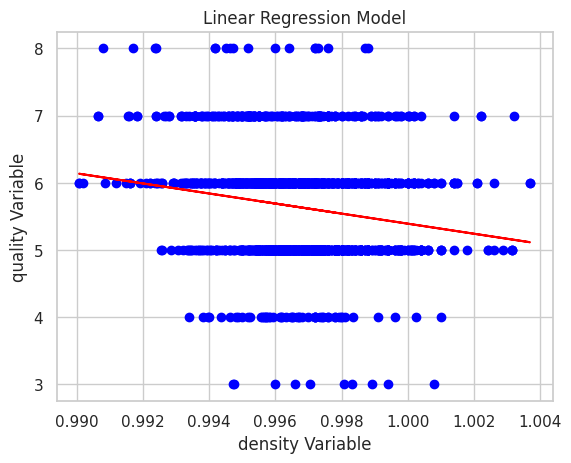

Linear Regression Equation: y = -74.84601360147538x + 80.23853802079016'


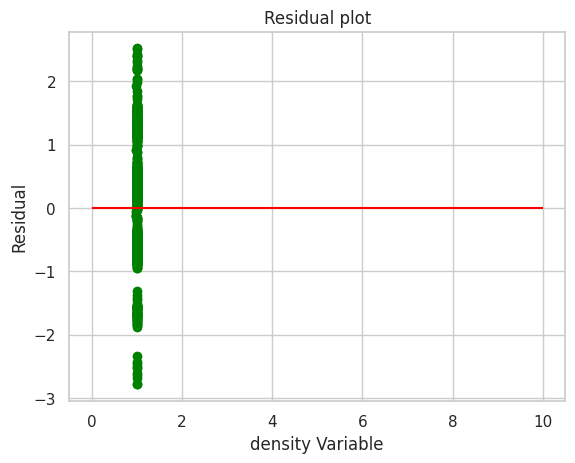

This is not a good model to predict the target variable. Can not get conclusive results


In [371]:
#Code for Linear Regression Model for density
df.corr()
#selecting the independent and dependent variables
x= df1['density'].values.reshape(-1,1)
y= df1[ 'quality'].values.reshape(-1,1)

#fitting the Linear regression model
model = LinearRegression()
model.fit(x,y)
#plotting the regression Line
plt.scatter(x, y, color='blue')
plt.plot(x, model.predict(x), color='red')
plt.title('Linear Regression Model')
plt.xlabel('density Variable')
plt.ylabel('quality Variable')
plt.show()

#calculating the linear regression equation
print("Linear Regression Equation: y = {}x + {}'".format(model.coef_[0][0], model.intercept_[0]))

#calculating the residual
residual = y - model.predict(x)

#plotting the residual graph
plt.scatter(x, residual, color='green')
plt.hlines (y=0, xmin=0, xmax=10, color="red")
plt.title('Residual plot')
plt.xlabel('density Variable')
plt.ylabel('Residual')
plt.show()

#checking for good model to predict the target variable

if np.abs(residual).mean() < 0.1:
  print('This is a good model to predict the target variable. Can get conclusive results')
else:
  print('This is not a good model to predict the target variable. Can not get conclusive results')

In [372]:
# Define the predictor variables and target variable
X1 = df1[['volatile acidity']]
Y1 = df1['quality']

# Add a constant to the predictor variables for the intercept term
X1 = sm.add_constant(X1)

# Fit the multiple linear regression model using Ordinary Least Squares (OLS)
model1 = sm.OLS(Y1, X1).fit()

# Print the summary of the model
print("model 1 summary:",model1.summary())

# Define the predictor variables and target variable for model 2
X2 = df[['fixed acidity']]
Y2 = df['quality']

# Add a constant to the predictor variables for the intercept term
X2 = sm.add_constant(X2)

# Fit the multiple linear regression model using Ordinary Least Squares (OLS)
model2 = sm.OLS(Y2, X2).fit()

# Print the summary of the model
print("model 2 summary:",model2.summary())

# Define the predictor variables and target variable for model 3
X3 = df[[ 'pH']]
Y3 = df['quality']

# Add a constant to the predictor variables for the intercept term
X3 = sm.add_constant(X3)

# Fit the multiple linear regression model using Ordinary Least Squares (OLS)
model3 = sm.OLS(Y3, X3).fit()

# Print the summary of the model
print("model 3 summary:",model3.summary())

# Define the predictor variables and target variable for model 4
X4 = df[['density']]
Y4 = df['quality']

# Add a constant to the predictor variables for the intercept term
X4 = sm.add_constant(X4)

# Fit the multiple linear regression model using Ordinary Least Squares (OLS)
model4 = sm.OLS(Y4, X4).fit()

# Print the summary of the model
print("model 4 summary:",model4.summary())


#print the adjusted r2 values

print("R2 Value for Model 1 ", model1.rsquared_adj)

print("R2 Value for Model 2 ", model2.rsquared_adj)

print("R2 Value for Model 3 ", model3.rsquared_adj)

print("R2 Value for Model 4 ", model4.rsquared_adj)

model 1 summary:                             OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     287.4
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           2.05e-59
Time:                        19:46:01   Log-Likelihood:                -1794.3
No. Observations:                1599   AIC:                             3593.
Df Residuals:                    1597   BIC:                             3603.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                6.

In [373]:
# Define the predictor variables and target variable
X1 = df1[['volatile acidity', 'fixed acidity', 'pH','density']]
Y1 = df1['quality']

# Add a constant to the predictor variables for the intercept term
X1 = sm.add_constant(X1)

# Fit the multiple linear regression model using Ordinary Least Squares (OLS)
model1 = sm.OLS(Y1, X1).fit()


# Print the summary of the model
print("model 1 summary:",model1.summary())

# Define the predictor variables and target variable for model 2
X2 = df[['pH','density','volatile acidity', 'fixed acidity']]
Y2 = df['quality']

# Add a constant to the predictor variables for the intercept term
X2 = sm.add_constant(X2)

# Fit the multiple linear regression model using Ordinary Least Squares (OLS)
model2 = sm.OLS(Y2, X2).fit()

# Print the summary of the model
print("model 2 summary:",model2.summary())

# Define the predictor variables and target variable for model 3
X3 = df[['pH','volatile acidity', 'fixed acidity', 'density']]
Y3 = df['quality']

# Add a constant to the predictor variables for the intercept term
X3 = sm.add_constant(X3)

# Fit the multiple linear regression model using Ordinary Least Squares (OLS)
model3 = sm.OLS(Y3, X3).fit()

# Print the summary of the model
print("model 3 summary:",model3.summary())

# Define the predictor variables and target variable for model 4
X4 = df[[ 'fixed acidity', 'density','pH','volatile acidity']]
Y4 = df['quality']

# Add a constant to the predictor variables for the intercept term
X4 = sm.add_constant(X4)

# Fit the multiple linear regression model using Ordinary Least Squares (OLS)
model4 = sm.OLS(Y4, X4).fit()

# Print the summary of the model
print("model 4 summary:",model4.summary())


#print the adjusted r2 values

print("R2 Vale for Model 1 ", model1.rsquared_adj)

print("R2 Vale for Model 2 ", model2.rsquared_adj)

print("R2 Vale for Model 3 ", model3.rsquared_adj)

print("R2 Vale for Model 4 ", model4.rsquared_adj)


model 1 summary:                             OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     121.4
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           1.71e-90
Time:                        19:46:02   Log-Likelihood:                -1714.0
No. Observations:                1599   AIC:                             3438.
Df Residuals:                    1594   BIC:                             3465.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              168.

In [374]:
# # Define the predictor variables and target variable
# X1 = df[['citric acid', 'residual sugar', 'pHs']]
# Y1 = df['alcohol']

# Add a constant to the predictor variables for the intercept term
X1 = sm.add_constant(X1)

# Fit the multiple linear regression model using Ordinary Least Squares (OLS)
model1 = sm.OLS(Y1, X1).fit()

# Print the summary of the model
print("model 1 summary:",model1.summary())

# # Define the predictor variables and target variable for model 2
# X2 = df[['citric acid', 'residual sugar', 'density']]
# Y2 = df['alcohol']

# Add a constant to the predictor variables for the intercept term
X2 = sm.add_constant(X2)

# Fit the multiple linear regression model using Ordinary Least Squares (OLS)
model2 = sm.OLS(Y2, X2).fit()

# Print the summary of the model
print("model 2 summary:",model2.summary())

# # Define the predictor variables and target variable for model 3
# X3 = df[['density', 'residual sugar', 'pHs']]
# Y3 = df['alcohol']

# Add a constant to the predictor variables for the intercept term
X3 = sm.add_constant(X3)

# Fit the multiple linear regression model using Ordinary Least Squares (OLS)
model3 = sm.OLS(Y3, X3).fit()

# Print the summary of the model
print("model 3 summary:",model3.summary())

# # Define the predictor variables and target variable for model 4
# X4 = df[['citric acid', 'density', 'pHs']]
# Y4 = df['alcohol']

# Add a constant to the predictor variables for the intercept term
X4 = sm.add_constant(X4)

# Fit the multiple linear regression model using Ordinary Least Squares (OLS)
model4 = sm.OLS(Y4, X4).fit()

# Print the summary of the model
print("model 4 summary:",model4.summary())


#print the adjusted r2 values

print("R2 Vale for Model 1 ", model1.rsquared_adj)

print("R2 Vale for Model 2 ", model2.rsquared_adj)

print("R2 Vale for Model 3 ", model3.rsquared_adj)

print("R2 Vale for Model 4 ", model4.rsquared_adj)

model 1 summary:                             OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     121.4
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           1.71e-90
Time:                        19:46:04   Log-Likelihood:                -1714.0
No. Observations:                1599   AIC:                             3438.
Df Residuals:                    1594   BIC:                             3465.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              168.

In [375]:
# Define the predictor variables and target variable
X = df1[['volatile acidity', 'fixed acidity', 'pH', 'density']]
Y = df1['quality']

# Add a constant to the predictor variables for the intercept term
X = sm.add_constant(X)

# Fit the multiple linear regression model using Ordinary Least Squares (OLS)
model = sm.OLS(Y, X).fit()

# Print the summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     121.4
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           1.71e-90
Time:                        19:46:04   Log-Likelihood:                -1714.0
No. Observations:                1599   AIC:                             3438.
Df Residuals:                    1594   BIC:                             3465.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              168.6576     13.099  

In [386]:
from sklearn.model_selection import train_test_split


In [387]:
# Assuming X1, Y1, X2, Y2, X3, Y3, X4, Y4 are defined as predictor variables and target variables

# Split the data into training and testing sets for model 1
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.2, random_state=42)

# Fit the multiple linear regression model using Ordinary Least Squares (OLS) on training data for model 1
model1 = sm.OLS(Y1_train, X1_train).fit()

# Print the summary of the model for model 1
print("model 1 summary:", model1.summary())

# Split the data into training and testing sets for model 2
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.2, random_state=42)

# Fit the multiple linear regression model using Ordinary Least Squares (OLS) on training data for model 2
model2 = sm.OLS(Y2_train, X2_train).fit()

# Print the summary of the model for model 2
print("model 2 summary:", model2.summary())

# Split the data into training and testing sets for model 3
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y3, test_size=0.2, random_state=42)

# Fit the multiple linear regression model using Ordinary Least Squares (OLS) on training data for model 3
model3 = sm.OLS(Y3_train, X3_train).fit()

# Print the summary of the model for model 3
print("model 3 summary:", model3.summary())

# Split the data into training and testing sets for model 4
X4_train, X4_test, Y4_train, Y4_test = train_test_split(X4, Y4, test_size=0.2, random_state=42)

# Fit the multiple linear regression model using Ordinary Least Squares (OLS) on training data for model 4
model4 = sm.OLS(Y4_train, X4_train).fit()

# Print the summary of the model for model 4
print("model 4 summary:", model4.summary())

# Print the adjusted R-squared values for each model
print("R2 Value for Model 1:", model1.rsquared_adj)
print("R2 Value for Model 2:", model2.rsquared_adj)
print("R2 Value for Model 3:", model3.rsquared_adj)
print("R2 Value for Model 4:", model4.rsquared_adj)


model 1 summary:                             OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     89.89
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           2.37e-67
Time:                        20:03:38   Log-Likelihood:                -1380.9
No. Observations:                1279   AIC:                             2772.
Df Residuals:                    1274   BIC:                             2798.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              162.

# Model evaluation

In [388]:
from sklearn.metrics import mean_squared_error

In [389]:
# Predict alcohol values for testing data for model 1
Y1_pred = model1.predict(X1_test)

# Calculate mean squared error for model 1
mse1 = mean_squared_error(Y1_test, Y1_pred)
print("Mean Squared Error for Model 1:", mse1)

# Predict alcohol values for testing data for model 2
Y2_pred = model2.predict(X2_test)

# Calculate mean squared error for model 2
mse2 = mean_squared_error(Y2_test, Y2_pred)
print("Mean Squared Error for Model 2:", mse2)

# Predict alcohol values for testing data for model 3
Y3_pred = model3.predict(X3_test)

# Calculate mean squared error for model 3
mse3 = mean_squared_error(Y3_test, Y3_pred)
print("Mean Squared Error for Model 3:", mse3)

# Predict alcohol values for testing data for model 4
Y4_pred = model4.predict(X4_test)

# Calculate mean squared error for model 4
mse4 = mean_squared_error(Y4_test, Y4_pred)
print("Mean Squared Error for Model 4:", mse4)


Mean Squared Error for Model 1: 0.46954356685984927
Mean Squared Error for Model 2: 0.4695435668598627
Mean Squared Error for Model 3: 0.4695435668598562
Mean Squared Error for Model 4: 0.4695435668598682


In [393]:
print(model.get_params())

{'copy_X': True, 'fit_intercept': False, 'n_jobs': None, 'positive': False}


In [394]:
# Fit the model using statsmodels
model = sm.OLS(Y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     121.4
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           1.71e-90
Time:                        20:10:56   Log-Likelihood:                -1714.0
No. Observations:                1599   AIC:                             3438.
Df Residuals:                    1594   BIC:                             3465.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              168.6576     13.099  

In [396]:
# Predict the target variable on the testing set
y_pred = model.predict(X1_test)

# Print the predicted values
print(y_pred)


803     5.347108
124     5.769050
350     5.260301
682     5.574293
1326    5.811768
          ...   
1259    5.523717
1295    5.252048
1155    5.484973
963     6.167153
704     5.223936
Length: 320, dtype: float64


In [399]:
# Import the necessary module
from sklearn.metrics import r2_score

# Evaluate the model on the test set
results = r2_score(Y1_test, model.predict(X1_test))
print("Test accuracy:", results)

# Evaluate the model on the training set
results = r2_score(Y1_train, model.predict(X1_train))
print("Train accuracy:", results)

Test accuracy: 0.28468529627368255
Train accuracy: 0.2197613412840519


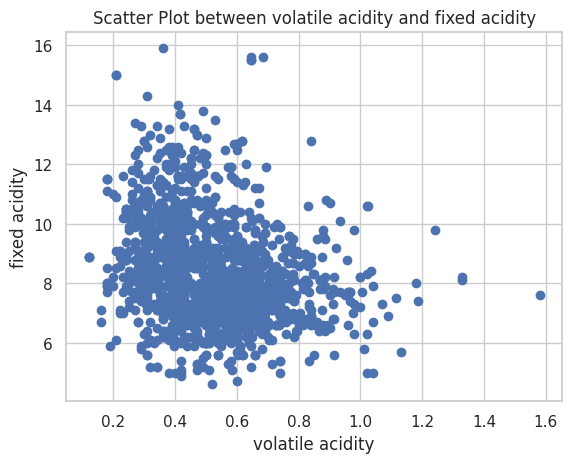

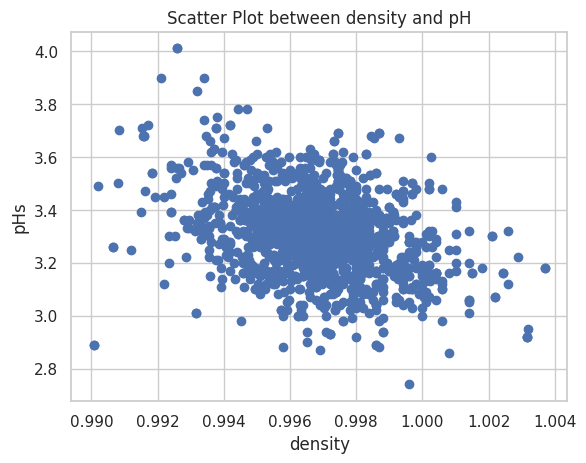

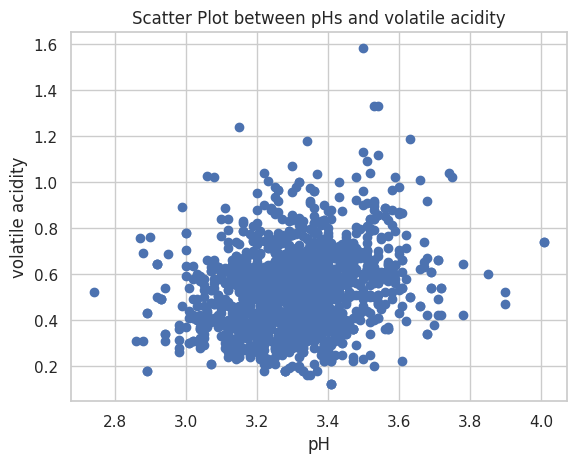

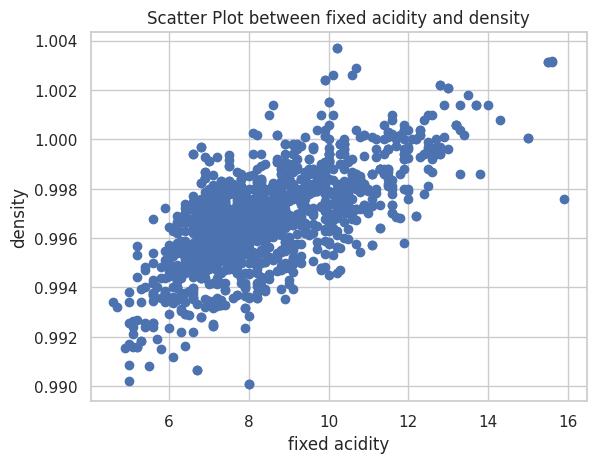

In [379]:
#Scatter Plot
plt.scatter(df1["volatile acidity"],df1["fixed acidity"])
plt.xlabel("volatile acidity")
plt.ylabel("fixed acidity")
plt.title("Scatter Plot between volatile acidity and fixed acidity")
plt.show()

plt.scatter(df1["density"],df1["pH"])
plt.xlabel("density")
plt.ylabel("pHs")
plt.title("Scatter Plot between density and pH")
plt.show()

plt.scatter(df1["pH"],df1["volatile acidity"])
plt.xlabel("pH")
plt.ylabel("volatile acidity")
plt.title("Scatter Plot between pHs and volatile acidity")
plt.show()

plt.scatter(df1["fixed acidity"],df1["density"])
plt.xlabel("fixed acidity")
plt.ylabel("density")
plt.title("Scatter Plot between fixed acidity and density")
plt.show()

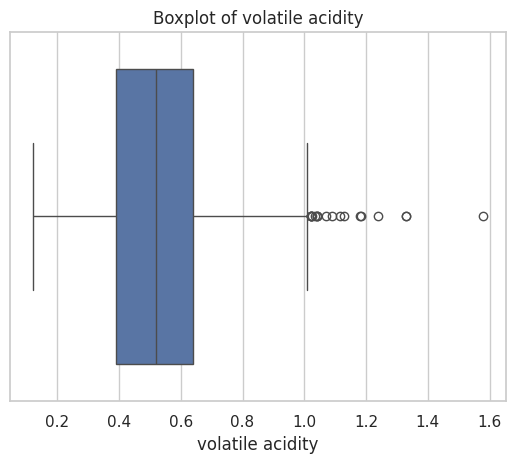

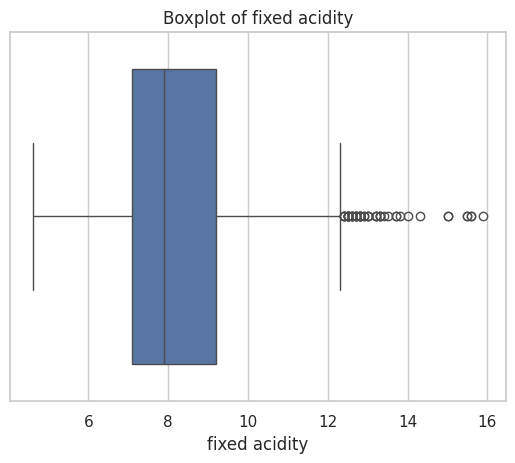

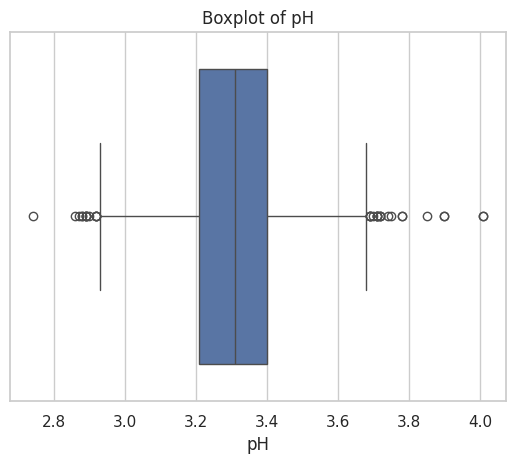

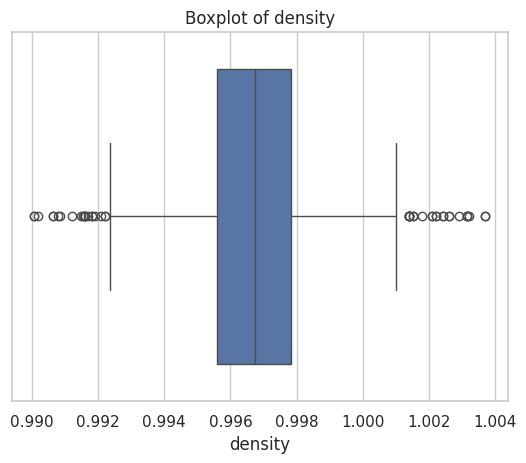

In [380]:
#BOX PLOT
#Box plot of citric acid
sns.boxplot(x=df1["volatile acidity"])
plt.title("Boxplot of volatile acidity")
plt.show()

#Box plot of Residual Sugar
sns.boxplot(x=df1["fixed acidity"])
plt.title("Boxplot of fixed acidity")
plt.show()

#Box plot of pHs
sns.boxplot(x=df1["pH"])
plt.title("Boxplot of pH")
plt.show()

#Box plot of density
sns.boxplot(x=df1["density"])
plt.title("Boxplot of density")
plt.show()

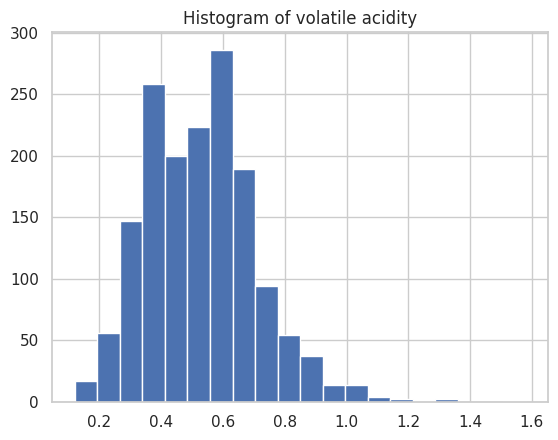

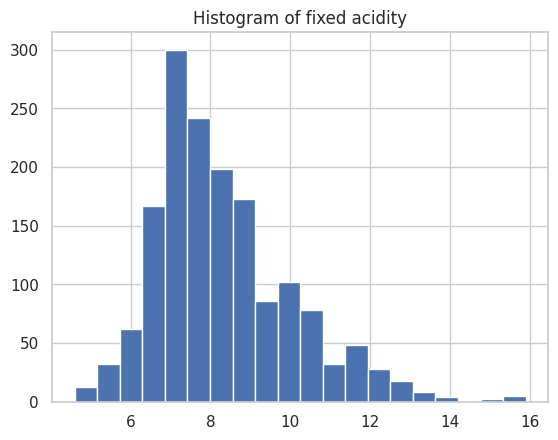

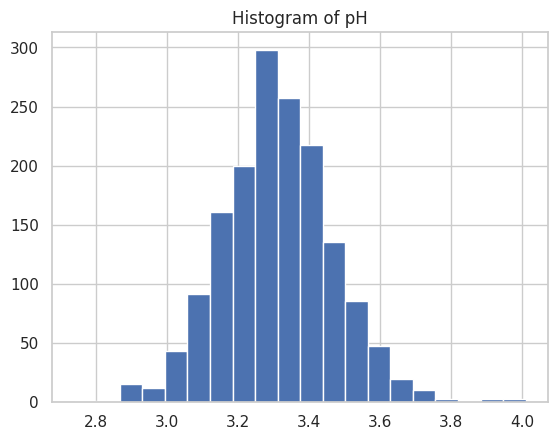

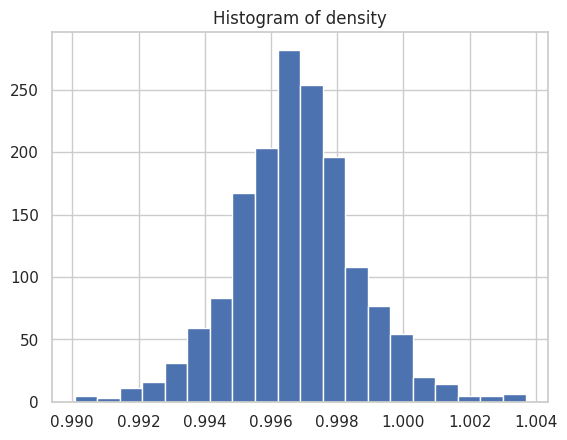

In [381]:
#Histogram plots

#Histogram of volatile acidity
plt.hist(df1["volatile acidity"], bins=20)
plt.title("Histogram of volatile acidity")
plt.show()

#Histogram of fixed acidity
plt.hist(df1["fixed acidity"], bins=20)
plt.title("Histogram of fixed acidity")
plt.show()

#Histogram of pHs
plt.hist(df1["pH"], bins=20)
plt.title("Histogram of pH")
plt.show()

#Histogram of density
plt.hist(df1["density"], bins=20)
plt.title("Histogram of density")
plt.show()




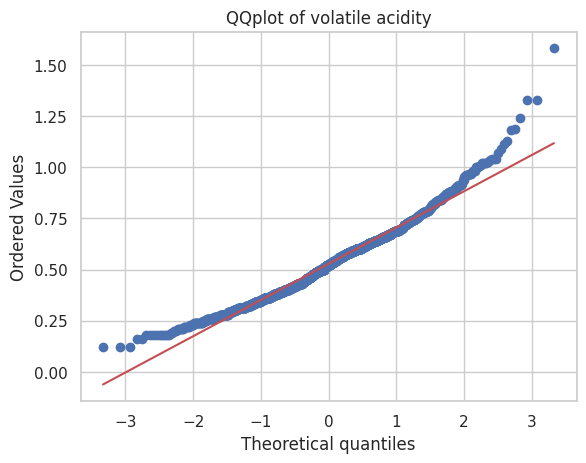

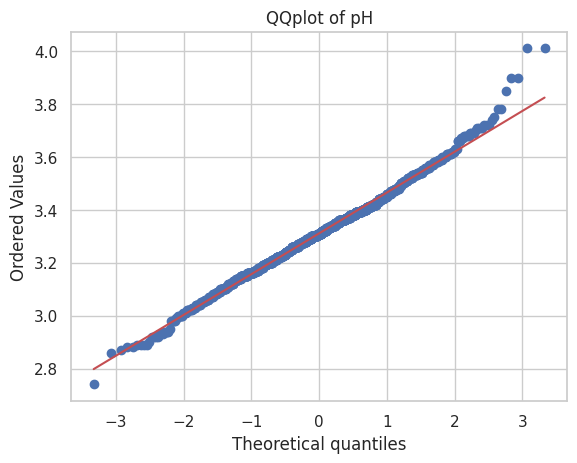

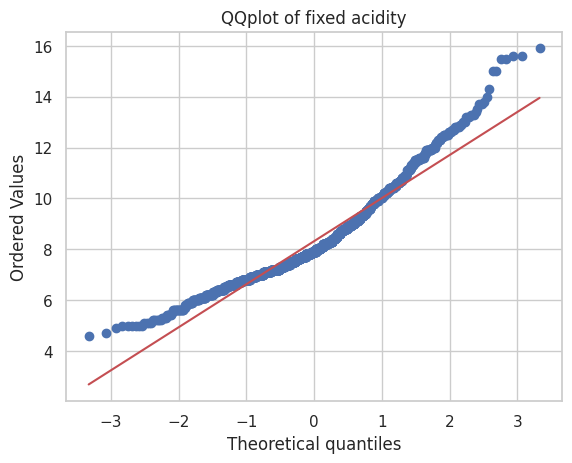

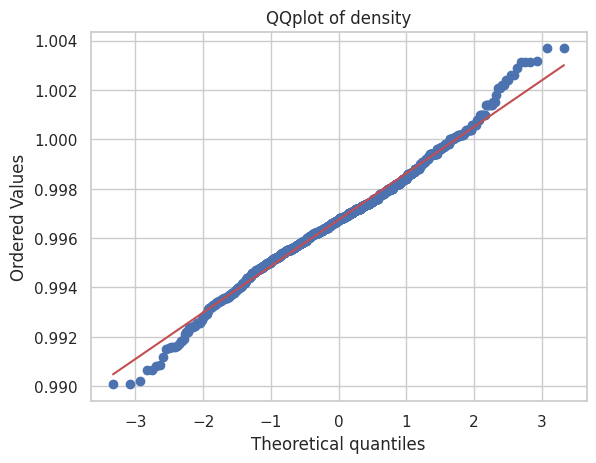

In [382]:
#Q-Q plots of different Variables
#QQ Plot of Volatile acidity
stats.probplot(df1["volatile acidity"], dist="norm", plot=plt)
plt.title("QQplot of volatile acidity")
plt.show()

#QQ Plot of pHs
stats.probplot(df1["pH"], dist="norm", plot=plt)
plt.title("QQplot of pH")
plt.show()

#QQ Plot of Fixed acidity
stats.probplot(df1["fixed acidity"], dist="norm", plot=plt)
plt.title("QQplot of fixed acidity")
plt.show()

#QQ Plot of density
stats.probplot(df1["density"], dist="norm", plot=plt)
plt.title("QQplot of density")
plt.show()
